In [1]:
import datetime
import os
import gc
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from keras import optimizers
from keras import backend as K
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
image_root_dir = 'E:\LargeDatasets\SAR-Ocean-Images\GeoTIFF\OrganisationForModel'
train_dir = f'{image_root_dir}\\train'
val_dir = f'{image_root_dir}\\val'
test_dir = f'{image_root_dir}\\test'

In [3]:
batch_size = 10

test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_dir, class_mode = 'categorical',
        target_size=(540, 490), batch_size = batch_size) 

val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_dir, class_mode = 'categorical',
        target_size=(540, 490), batch_size = batch_size)

train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_dir, class_mode = 'categorical',
        target_size=(540, 490), batch_size= batch_size)

C:\Users\mattl\anaconda3\envs\learn-env\lib\site-packages\keras_preprocessing\image\utils.py:179: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


Found 3756 images belonging to 10 classes.
Found 3756 images belonging to 10 classes.
Found 30041 images belonging to 10 classes.


In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(540, 490, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [5]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=.001),
              metrics=['acc'])

In [6]:
history = model.fit(train_generator,
                        steps_per_epoch=30041//batch_size,
                        epochs=5,
                        validation_data=val_generator,
                        validation_steps=3756//batch_size)

Epoch 1/5
3004/3004 [==============================] - 650s 216ms/step - loss: 2.2544 - acc: 0.1446 - val_loss: 2.1746 - val_acc: 0.1509
Epoch 2/5
3004/3004 [==============================] - 649s 216ms/step - loss: 2.2245 - acc: 0.1474 - val_loss: 2.1725 - val_acc: 0.1491
Epoch 3/5
3004/3004 [==============================] - 610s 203ms/step - loss: 2.2422 - acc: 0.1363 - val_loss: 2.2296 - val_acc: 0.1275
Epoch 4/5
3004/3004 [==============================] - 563s 187ms/step - loss: 2.2299 - acc: 0.1277 - val_loss: 2.2300 - val_acc: 0.1277
Epoch 5/5
3004/3004 [==============================] - 571s 190ms/step - loss: 2.2301 - acc: 0.1281 - val_loss: 2.2298 - val_acc: 0.1307


In [7]:
model.evaluate(test_generator)

376/376 [==============================] - 87s 232ms/step - loss: 2.2297 - acc: 0.1305


[2.229677200317383, 0.13045793771743774]

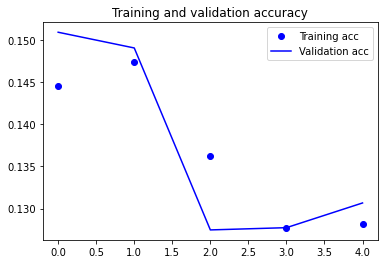

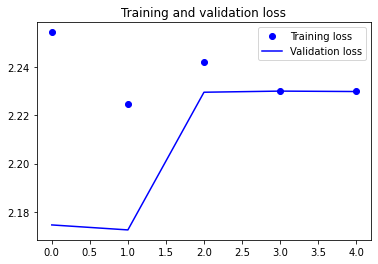

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [12]:
model.save('.\SavedModels\BaselineCNN', overwrite = True)

INFO:tensorflow:Assets written to: .\SavedModels\BaselineCNN\assets
